#### Data audit & cleaning plan

###### Load CSVs & Inspect Data

In [3]:
import pandas as pd

df = pd.read_csv(r"C:/Users/HP/supply-chain-delay/data/raw/smart_logistics_dataset.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
for col in df.columns:
    print(col, df[col].nunique())


             Timestamp  Asset_ID  Latitude  Longitude  Inventory_Level  \
0  2024-03-20 00:11:14   Truck_7  -65.7383    11.2497              390   
1  2024-10-30 07:53:51   Truck_6   22.2748  -131.7086              491   
2  2024-07-29 18:42:48  Truck_10   54.9232    79.5455              190   
3  2024-10-28 00:50:54   Truck_9   42.3900    -1.4788              330   
4  2024-09-27 15:52:58   Truck_7  -65.8477    47.9468              480   

  Shipment_Status  Temperature  Humidity Traffic_Status  Waiting_Time  \
0         Delayed         27.0      67.8         Detour            38   
1      In Transit         22.5      54.3          Heavy            16   
2      In Transit         25.2      62.2         Detour            34   
3       Delivered         25.4      52.3          Heavy            37   
4         Delayed         20.5      57.2          Clear            56   

   User_Transaction_Amount  User_Purchase_Frequency Logistics_Delay_Reason  \
0                      320            

######  Parse Dates

In [10]:
def parse_timestamp(df, col='timestamp'):
    """
    Convert timestamp column to datetime
    """
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    else:
        raise KeyError(f"Column '{col}' not found in DataFrame")
    return df

###### Standardize Text

In [11]:
def standardize_text(df, cols):
    """
    Standardize text columns: lowercase + strip spaces
    """
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip().str.lower()
    return df

###### Create Derived Date Fields

In [12]:
def add_time_fields(df, col='timestamp'):
    """
    Add derived time features from timestamp
    """
    if col in df.columns:
        df['month'] = df[col].dt.month
        df['dow'] = df[col].dt.dayofweek  # 0 = Monday
        df['hour'] = df[col].dt.hour       # optional: time of day
    return df

###### Drop Duplicates

In [13]:
def basic_clean(df):
    """
    Drop duplicate rows
    """
    df = df.drop_duplicates()
    return df

######  Save Cleaned Data

In [14]:
def standardize_column_names(df):
    """
    Standardize column names: lowercase, strip spaces, replace spaces with underscores
    """
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

In [20]:
import pandas as pd
import os

# Your existing cleaning functions here
# standardize_column_names, parse_timestamp, standardize_text, add_time_fields, basic_clean

def main():
    input_path = r"C:/Users/HP/supply-chain-delay/data/raw/smart_logistics_dataset.csv"
    output_path = r"C:/Users/HP/supply-chain-delay/data/interim/smart_logistics_cleaned.csv"

    # Ensure output folder exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Load data
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"CSV file not found at {input_path}")
    
    df = pd.read_csv(input_path)

    # Standardize column names
    df = standardize_column_names(df)

    # Parse timestamp
    df = parse_timestamp(df, col='timestamp')

    # Standardize text columns
    text_cols = ['shipment_status', 'logistics_delay_reason']
    df = standardize_text(df, text_cols)

    # Add derived time fields
    df = add_time_fields(df, col='timestamp')

    # Basic cleaning
    df = basic_clean(df)

    # Save cleaned CSV
    df.to_csv(output_path, index=False)
    print(f"✅ Cleaned data saved to {output_path}")

# THIS IS CRUCIAL: actually call the function
main()


✅ Cleaned data saved to C:/Users/HP/supply-chain-delay/data/interim/smart_logistics_cleaned.csv


Columns: ['timestamp', 'asset_id', 'latitude', 'longitude', 'inventory_level', 'shipment_status', 'temperature', 'humidity', 'traffic_status', 'waiting_time', 'user_transaction_amount', 'user_purchase_frequency', 'logistics_delay_reason', 'asset_utilization', 'demand_forecast', 'logistics_delay', 'month', 'dow', 'hour']

Data types:
 timestamp                   object
asset_id                    object
latitude                   float64
longitude                  float64
inventory_level              int64
shipment_status             object
temperature                float64
humidity                   float64
traffic_status              object
waiting_time                 int64
user_transaction_amount      int64
user_purchase_frequency      int64
logistics_delay_reason      object
asset_utilization          float64
demand_forecast              int64
logistics_delay              int64
month                        int64
dow                          int64
hour                         int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9168\2028663798.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='Blues')


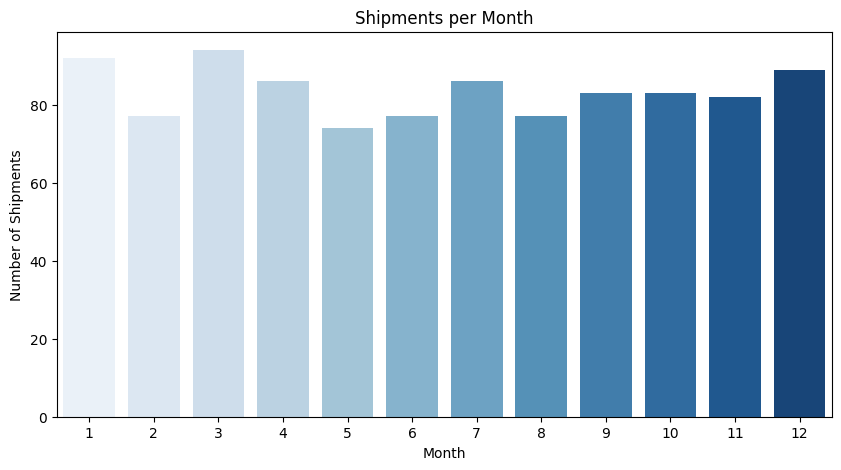

C:\Users\HP\AppData\Local\Temp\ipykernel_9168\2028663798.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dow', data=df, palette='Greens')


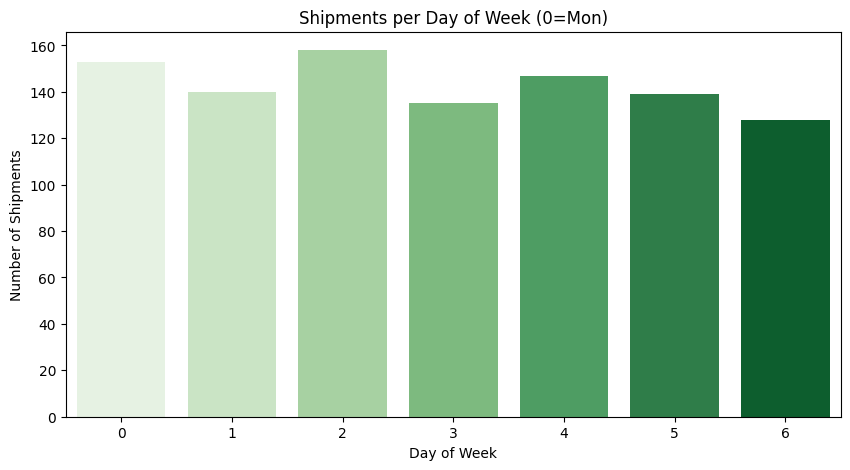

C:\Users\HP\AppData\Local\Temp\ipykernel_9168\2028663798.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='Oranges')


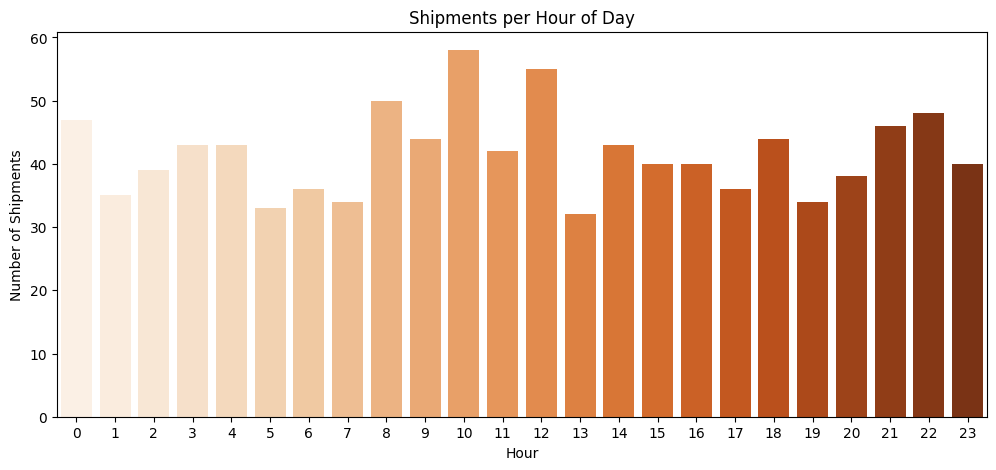

C:\Users\HP\AppData\Local\Temp\ipykernel_9168\2028663798.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='logistics_delay', data=df, palette='Reds')


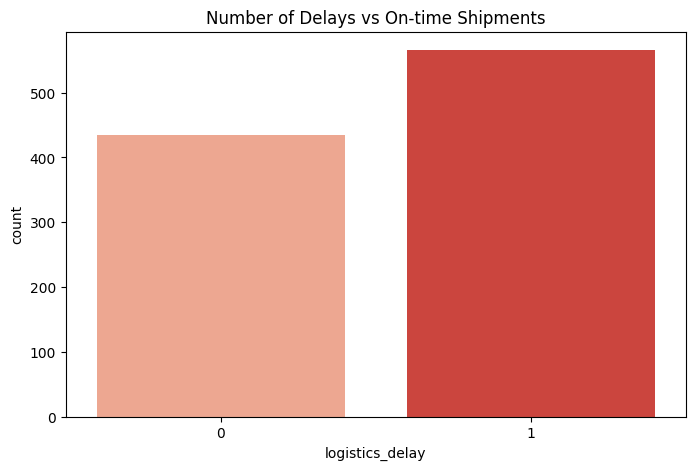

In [21]:
# notebooks/01_eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Load cleaned dataset
# -------------------------------
input_path = r"C:/Users/HP/supply-chain-delay/data/interim/smart_logistics_cleaned.csv"
df = pd.read_csv(input_path)

# -------------------------------
# 1. Inspect columns, dtypes, unique counts, nulls, duplicates
# (Only inspection, no cleaning)
# -------------------------------
print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nShape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# -------------------------------
# 2. Categorical analysis (value counts)
# -------------------------------
categorical_cols = ['shipment_status', 'logistics_delay_reason']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# -------------------------------
# 3. Time-based analysis
# -------------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Shipments per month
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df, palette='Blues')
plt.title('Shipments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.show()

# Shipments per day of week
plt.figure(figsize=(10,5))
sns.countplot(x='dow', data=df, palette='Greens')
plt.title('Shipments per Day of Week (0=Mon)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Shipments')
plt.show()

# Shipments per hour of day
plt.figure(figsize=(12,5))
sns.countplot(x='hour', data=df, palette='Oranges')
plt.title('Shipments per Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Shipments')
plt.show()

# -------------------------------
# 4. Delay analysis
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='logistics_delay', data=df, palette='Reds')
plt.title('Number of Delays vs On-time Shipments')
plt.show()


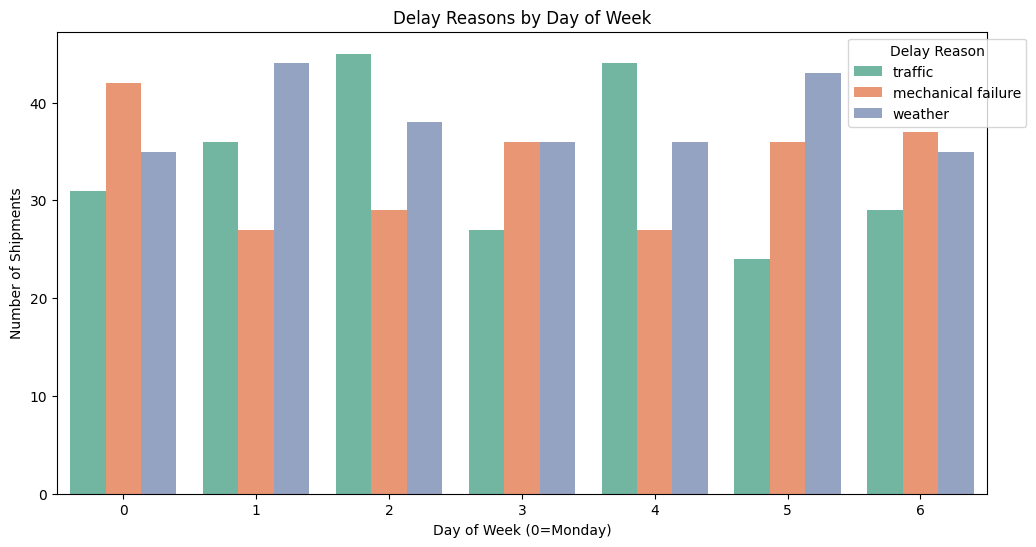

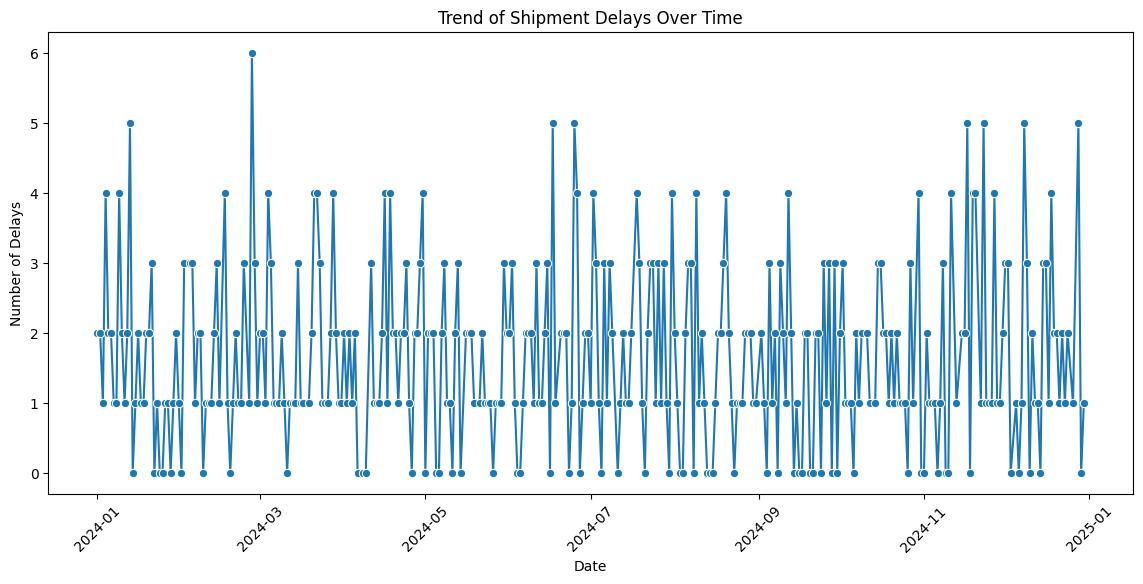

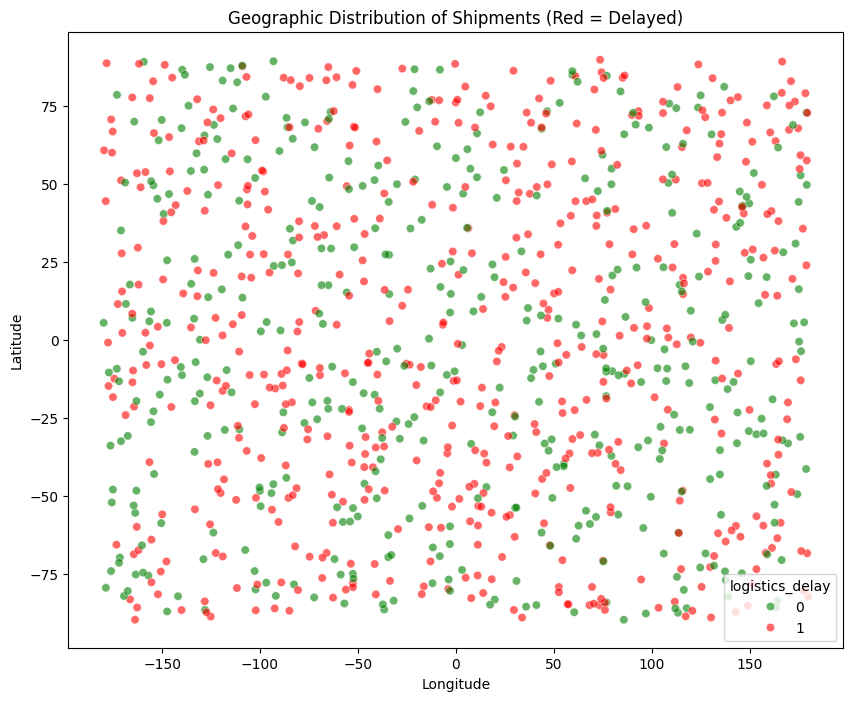

In [22]:
# -------------------------------
# 5. Delay reasons vs day of week
# -------------------------------
plt.figure(figsize=(12,6))
sns.countplot(x='dow', hue='logistics_delay_reason', data=df, palette='Set2')
plt.title('Delay Reasons by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Shipments')
plt.legend(title='Delay Reason', bbox_to_anchor=(1.05, 1))
plt.show()

# -------------------------------
# 6. Delay trend over time
# -------------------------------
# Aggregate number of delays per day
df['date'] = df['timestamp'].dt.date
delay_trend = df.groupby('date')['logistics_delay'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='logistics_delay', data=delay_trend, marker='o')
plt.title('Trend of Shipment Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 7. Geographic heatmap (Latitude & Longitude)
# -------------------------------
# Only if latitude & longitude exist
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(
        x='longitude', y='latitude', 
        hue='logistics_delay', 
        data=df, 
        palette={0:'green',1:'red'},  # 0=on-time, 1=delayed
        alpha=0.6
    )
    plt.title('Geographic Distribution of Shipments (Red = Delayed)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
